In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df = pd.read_csv("./berlin-airbnb-data/listings_summary.csv")

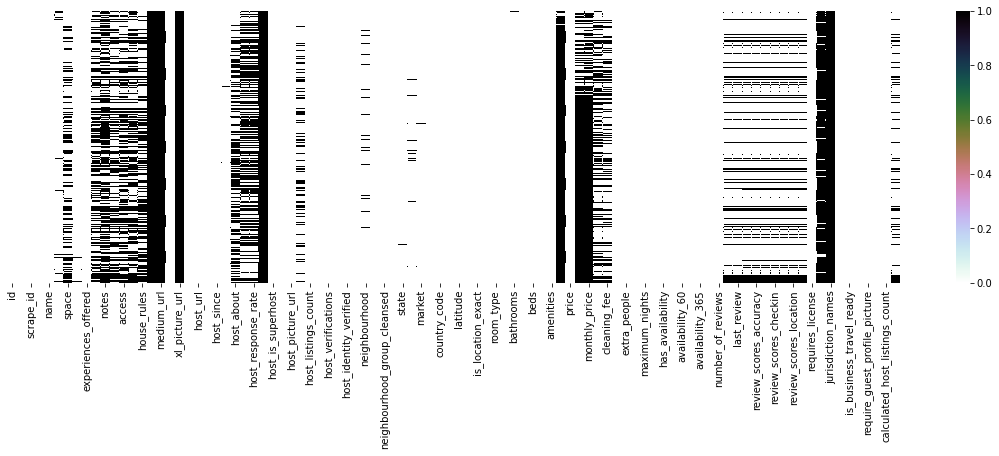

In [3]:
#source : https://www.kaggle.com/mhmdpkts/predict-price-ann-data-cleaning-future-engineering
fig, ax = plt.subplots(figsize = (20, 5))
sns.heatmap(df.isna(), cmap = "cubehelix_r", yticklabels='')
plt.show()

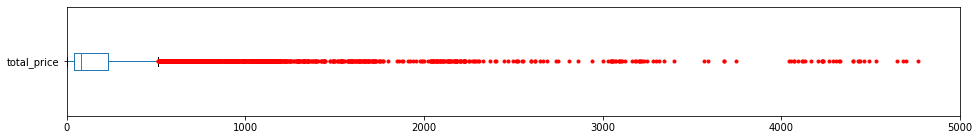

In [4]:
#Sort out the Price-Section

df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)
df.cleaning_fee = df.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
df.security_deposit = df.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)
df.extra_people = df.extra_people.str.replace('$', '').str.replace(',', '').astype(float)

df['cleaning_fee'].fillna(0, inplace=True)
df['security_deposit'].fillna(0, inplace=True)
df['total_price'] = df['price'] + df['cleaning_fee'] + df['security_deposit']
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
df['total_price'].plot(kind='box', xlim=(0, 5000), vert=False, flierprops=red_square, figsize=(16,2))
#drop the columns that were merged 
df.drop(['cleaning_fee', 'security_deposit', 'price'], inplace=True, axis = 1)

In [5]:
def nan_checker(df):
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    return df_nan

In [6]:
#removing 100% of the NULL values and identity values
col_list_to_drop = [] 
columns = df.columns
df_nan = nan_checker(df)
length = len(df)
for col in df.columns:  
    if (df[col].dtype != 'float'and df[col].nunique(dropna=True) == df[col].notnull().sum()):
        col_list_to_drop.append(col)
df.drop(col_list_to_drop, inplace=True, axis = 1)

In [7]:
df_nan = nan_checker(df)
df_nan

,var,proportion,dtype
0,name,0.002616,object
1,summary,0.042701,object
2,space,0.378326,object
3,description,0.009001,object
4,neighborhood_overview,0.488294,object
5,notes,0.680073,object
6,transit,0.421958,object
7,access,0.519466,object
8,interaction,0.538578,object
9,house_rules,0.492329,object


In [8]:
for row in df_nan.iterrows():
    column_name = row[1]['var']
    rate = round(row[1]['proportion'], 3)
    if rate > 0.5:
        df.drop(column_name, inplace=True, axis = 1)

In [9]:
df.describe(include="all")

,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,total_price
count,2.255200e+04,22552,22493,21589,14020,22349,22552,11540,13036,11449,22552,2.255200e+04,22552,22526,22526,22436,22526,22526,22526,17458,22526.000000,22526.000000,22552,22526,22526,22552,21421,22552,22552,22547,22468,21896,22489,22552,22552,22552,22552.000000,22552.000000,22552,22552,22552,22552.000000,22520.000000,22534.000000,22512.000000,22552,22552,22552.000000,22552.000000,22552.000000,2.255200e+04,22552,22552,22552.000000,22552.000000,22552.000000,22552.000000,22552,22552.000000,18638,18644,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,22552,22552,22552,22552,22552,22552,22552.000000,18638.000000,22552.000000
unique,NaN,2,21873,21041,13598,21997,1,10781,12308,10350,22465,NaN,19180,5997,2914,1036,2,19100,19100,181,NaN,NaN,301,2,2,86,91,136,12,60,19,215,6,61,1,1,NaN,NaN,2,33,3,NaN,NaN,NaN,NaN,5,19985,NaN,NaN,NaN,NaN,75,1,NaN,NaN,NaN,NaN,2,NaN,2228,1312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,5,2,2,NaN,NaN,NaN
top,NaN,2018-11-07,Berlin Wohnung,"with en-suite bathroom, TV, WIFI, bed linen, a...",The Singer 109 Hostel is located in the heart ...,"with en-suite bathroom, TV, WIFI, bed linen, a...",none,Welcome Traveler. The Singer Hostel and Apart...,U-Bahn / Underground /Subway / Metro: U5 (Stra...,"- Most importantly, please have a respectful a...",https://a0.muscache.com/im/pictures/67c5efca-2...,NaN,https://www.airbnb.com/users/show/1625771,Anna,2013-08-19,"Berlin, Berlin, Germany",f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Neukölln,NaN,NaN,"['email', 'phone', 'reviews']",t,f,"Berlin, Berlin, Germany",Neukölln,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Berlin,Berlin,10245,Berlin,"Berlin, Germany",DE,Germany,NaN,NaN,t,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,{},NaN,NaN,NaN,NaN,today,t,NaN,NaN,NaN,NaN,2018-11-07,NaN,2017-05-28,2018-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,f,flexible,f,f,NaN,NaN,NaN
freq,NaN,22549,14,14,41,12,22552,43,26,30,3,NaN,45,216,51,17188,19515,56,56,2556,NaN,NaN,4103,22470,13824,22317,3209,1325,5497,22417,22417,855,22483,22419,22552,22552,NaN,NaN,16776,20225,11534,NaN,NaN,NaN,NaN,21766,75,NaN,NaN,NaN,NaN,2517,22552,NaN,NaN,NaN,NaN,22549,NaN,116,618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22544,15518,22552,9102,22396,22273,NaN,NaN,NaN
mean,2.018111e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.403355e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.330685,2.330685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509824,13.406107,NaN,NaN,NaN,2.637460,1.092695,1.161134,1.620558,NaN,NaN,1.332121,8.257716,7.157059,1.030505e+05,NaN,NaN,4.944173,11.146639,20.016096,79.852829,NaN,17.840679,NaN,NaN,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,NaN,NaN,NaN,NaN,NaN,NaN,1.918233,1.135525,203.682112
std,0.000000e+00,NaN,Na

we will not be using the reviews or host details for our analysis. We will separate out the location information,

In [10]:
review_host_text_columns =["scrape_id","picture_url",
                           "last_scraped", "name",
                           "summary", "space","description",
                           "experiences_offered", "neighborhood_overview",
                           "transit","house_rules", "host_id", "host_url",
                           "host_location","host_neighbourhood",
                           "host_name","host_since", "host_is_superhost", 
                           "host_thumbnail_url","host_picture_url","host_listings_count",
                           "host_total_listings_count", "host_verifications",
                           "host_has_profile_pic","host_identity_verified",
                           "amenities","minimum_nights","maximum_nights","calendar_updated",
                           "has_availability","availability_30",
                           "availability_60","availability_90",
                           "availability_365","calendar_last_scraped",
                           "number_of_reviews","first_review",
                           "last_review","review_scores_rating",
                           "review_scores_accuracy","review_scores_cleanliness",
                           "review_scores_checkin","review_scores_communication",
                           "review_scores_location","review_scores_value",
                           "instant_bookable","is_business_travel_ready",
                           "require_guest_profile_picture","require_guest_phone_verification",
                           "calculated_host_listings_count", "reviews_per_month"]

df.drop(review_host_text_columns, inplace=True, axis = 1)
df.describe(include="all")

,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,requires_license,cancellation_policy,total_price
count,22552,21421,22552,22552,22547,22468,21896,22489,22552,22552,22552,22552.000000,22552.000000,22552,22552,22552,22552.000000,22520.000000,22534.000000,22512.000000,22552,22552.000000,22552.000000,22552,22552,22552.000000
unique,86,91,136,12,60,19,215,6,61,1,1,NaN,NaN,2,33,3,NaN,NaN,NaN,NaN,5,NaN,NaN,2,5,NaN
top,"Berlin, Berlin, Germany",Neukölln,Tempelhofer Vorstadt,Friedrichshain-Kreuzberg,Berlin,Berlin,10245,Berlin,"Berlin, Germany",DE,Germany,NaN,NaN,t,Apartment,Private room,NaN,NaN,NaN,NaN,Real Bed,NaN,NaN,t,flexible,NaN
freq,22317,3209,1325,5497,22417,22417,855,22483,22419,22552,22552,NaN,NaN,16776,20225,11534,NaN,NaN,NaN,NaN,21766,NaN,NaN,22544,9102,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509824,13.406107,NaN,NaN,NaN,2.637460,1.092695,1.161134,1.620558,NaN,1.332121,8.257716,NaN,NaN,203.682112
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030825,0.057964,NaN,NaN,NaN,1.510548,0.329894,0.646156,1.174840,NaN,0.835034,11.151069,NaN,NaN,400.204480
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.345803,13.103557,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.489065,13.375411,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,1.000000,0.000000,NaN,NaN,41.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.509079,13.416779,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,1.000000,5.000000,NaN,NaN,80.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.532669,13.439259,NaN,NaN,NaN,3.000000,1.000000,1.000000,2.000000,NaN,1.000000,15.000000,NaN,NaN,229.000000


In [11]:
location_columns_for_prediction = ["street","neighbourhood","neighbourhood_cleansed",
                    "neighbourhood_group_cleansed","city",
                    "state","zipcode","market", "smart_location",
                    "country_code","country","latitude","longitude",
                    "is_location_exact","total_price"]
non_location_columns_for_prediction = [col for col in df.columns if col not in location_columns_for_prediction]
non_location_columns_for_prediction.append("total_price")

#get a new data_frame for both
dataFrameLoc = df[location_columns_for_prediction] 
dataFrame    =   df[non_location_columns_for_prediction]

In [12]:
dataFrame_nan = nan_checker(dataFrame)
dataFrame_nan['var']

0    bathrooms
1     bedrooms
2         beds
Name: var, dtype: object

In [13]:
dataFrame[dataFrame_nan["var"]].head(20)

,bathrooms,bedrooms,beds
0,1.0,1.0,2.0
1,1.0,1.0,1.0
2,1.0,1.0,2.0
3,1.0,1.0,1.0
4,1.0,1.0,2.0
5,2.5,4.0,7.0
6,1.0,0.0,1.0
7,1.0,1.0,2.0
8,1.0,1.0,3.0
9,1.0,1.0,1.0


In [14]:
from sklearn.impute import SimpleImputer
#filling all the missing values with mean
si = SimpleImputer(missing_values=np.nan, strategy='mean')
df_impute_train = dataFrame.iloc[:, :].copy(deep=True)
df_impute_train[dataFrame_nan['var']] = si.fit_transform(df_impute_train[dataFrame_nan['var']])
df_impute_train.head(10)

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,requires_license,cancellation_policy,total_price
0,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,1,28.0,t,strict_14_with_grace_period,290.0
1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,0.0,t,flexible,17.0
2,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,20.0,t,strict_14_with_grace_period,340.0
3,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,1,18.0,t,strict_14_with_grace_period,306.0
4,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,1,24.0,t,moderate,42.0
5,Apartment,Entire home/apt,7,2.5,4.0,7.0,Real Bed,5,10.0,t,strict_14_with_grace_period,660.0
6,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,1,0.0,t,strict_14_with_grace_period,570.0
7,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,1,13.0,t,strict_14_with_grace_period,120.0
8,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,2,20.0,t,strict_14_with_grace_period,640.0
9,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,1,26.0,t,strict_14_with_grace_period,63.0


In [15]:
#Generate a Categorical and Numerical Column List
numerical_columns = []
categoical_columns = []
for column in df_impute_train.columns:
    if df_impute_train[column].dtype == 'object':
        categoical_columns.append(column)
    else:
        numerical_columns.append(column)

In [16]:
print(df_impute_train["property_type"].unique())
property_mapping = {'Guesthouse':'Guesthouse', 'Apartment':'Apartment', 'Condominium':'others', 'Loft':'others','House':'Apartment','Serviced apartment':'others','Townhouse':'others','Boutique hotel':'others','Bed and breakfast':'others',
                    'Bungalow':'others','Boat':'others','Guest suite':'others','Other':'others','Island':'others',
                    'Hostel':'others','Train':'others','Camper/RV':'others','Houseboat':'others','Cabin':'others',
                    'Cottage':'others','Tiny house':'others','Chalet':'others','Castle':'others','Villa':'others',
                    'Aparthotel':'others','Hotel':'Hotel','Tipi':'others','Resort':'Resort','In-law':'others',
                    'Cave':'others','Barn':'others','Pension (South Korea)':'others','Guesthouse':'others','Casa particular (Cuba)':'others','others':'others'}
df_impute_train['property_type']=df_impute_train['property_type'].map(property_mapping)
print(df_impute_train["property_type"].unique())
df_impute_train[categoical_columns].describe()

['Guesthouse' 'Apartment' 'Condominium' 'Loft' 'House'
 'Serviced apartment' 'Townhouse' 'Boutique hotel' 'Bed and breakfast'
 'Bungalow' 'Boat' 'Guest suite' 'Other' 'Island' 'Hostel' 'Train'
 'Camper/RV' 'Houseboat' 'Cabin' 'Cottage' 'Tiny house' 'Chalet' 'Castle'
 'Villa' 'Aparthotel' 'Hotel' 'Tipi' 'Resort' 'In-law' 'Cave' 'Barn'
 'Pension (South Korea)' 'Casa particular (Cuba)']
['others' 'Apartment' 'Hotel' 'Resort']


,property_type,room_type,bed_type,requires_license,cancellation_policy
count,22552,22552,22552,22552,22552
unique,4,3,5,2,5
top,Apartment,Private room,Real Bed,t,flexible
freq,20623,11534,21766,22544,9102


In [17]:
#convert boolean in to 0 or 1
boolean_mapping =  {'t':1, 'f':0, 0:0, 1:1}
df_impute_train['requires_license']=df_impute_train['requires_license'].map(boolean_mapping)
df_impute_train.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,requires_license,cancellation_policy,total_price
0,others,Entire home/apt,3,1.0,1.0,2.0,Real Bed,1,28.0,1,strict_14_with_grace_period,290.0
1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,0.0,1,flexible,17.0
2,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,20.0,1,strict_14_with_grace_period,340.0
3,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,1,18.0,1,strict_14_with_grace_period,306.0
4,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,1,24.0,1,moderate,42.0


In [18]:
df_impute_train["bed_type"].unique()
bed_mapping =  {'Real Bed':'Real Bed', 
                'Others':'Others',
                'Pull-out Sofa': 'Others',
                'Couch':'Others',
                'Futon':'Others',
                'Airbed':'Others'}
df_impute_train['bed_type']=df_impute_train['bed_type'].map(bed_mapping)
df_impute_train.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,requires_license,cancellation_policy,total_price
0,others,Entire home/apt,3,1.0,1.0,2.0,Real Bed,1,28.0,1,strict_14_with_grace_period,290.0
1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,0.0,1,flexible,17.0
2,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,20.0,1,strict_14_with_grace_period,340.0
3,Apartment,Private room,2,1.0,1.0,1.0,Others,1,18.0,1,strict_14_with_grace_period,306.0
4,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,1,24.0,1,moderate,42.0


In [19]:
df_impute_train["cancellation_policy"].unique()
cancellation_mapping =  {'strict_14_with_grace_period':'strict', 
                'flexible':'flexible',
                'moderate': 'moderate',
                'super_strict_30':'strict',
                'super_strict_60':'strict',
                'strict':'strict'}
df_impute_train['cancellation_policy']=df_impute_train['cancellation_policy'].map(cancellation_mapping)
df_impute_train.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,requires_license,cancellation_policy,total_price
0,others,Entire home/apt,3,1.0,1.0,2.0,Real Bed,1,28.0,1,strict,290.0
1,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,1,0.0,1,flexible,17.0
2,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,20.0,1,strict,340.0
3,Apartment,Private room,2,1.0,1.0,1.0,Others,1,18.0,1,strict,306.0
4,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,1,24.0,1,moderate,42.0


<h1>Label Encoder Based </h1>

In [20]:
data_frame_for_prediction = df_impute_train.iloc[:, :].copy(deep=True)

In [21]:
#First lets try prediction with Labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in data_frame_for_prediction.columns:
    if data_frame_for_prediction[col].dtype == 'object':
        data_frame_for_prediction[col] = labelencoder.fit_transform(data_frame_for_prediction[col])
data_frame_for_prediction.describe(include='all')


,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,requires_license,cancellation_policy,total_price
count,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000
mean,0.252040,0.537691,2.637460,1.092695,1.161134,1.620558,0.965147,1.332121,8.257716,0.999645,0.878148,203.682112
std,0.829413,0.524254,1.510548,0.329660,0.645898,1.173798,0.183411,0.835034,11.151069,0.018832,0.818860,400.204480
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,41.000000
50%,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,80.000000
75%,0.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,15.000000,1.000000,2.000000,229.000000
max,3.000000,2.000000,16.000000,8.500000,12.000000,22.000000,1.000000,16.000000,250.000000,1.000000,2.000000,15000.000000


In [22]:
from sklearn.model_selection import train_test_split

#columns in prediction : 
columns_in_prediction = [col for col in data_frame_for_prediction.columns if col != "total_price"]
X_train, X_test, y_train, y_test = train_test_split(data_frame_for_prediction[columns_in_prediction], data_frame_for_prediction['total_price'], test_size=0.2)


In [23]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor    
from sklearn.metrics import mean_squared_error, r2_score

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
dt = regressor.fit(X_train, y_train) 
y_prediction = dt.predict(X_test)
r2 = r2_score(y_test, y_prediction)
r2
print(f"r2: {round(r2, 4)}")

r2: -0.0244


In [24]:
import xgboost as xgb
# xgboost matrices : https://xgboost.readthedocs.io/en/latest/python/python_intro.html
training_set = xgb.DMatrix(X_train, label=y_train)
testing_set = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.3
}

evals = [(testing_set, 'eval'), (training_set, 'train')]

rounds = 10
model = xgb.train(params, training_set, rounds, evals)

[0]	eval-rmse:377.06949	train-rmse:397.44959
[1]	eval-rmse:349.21112	train-rmse:364.81296
[2]	eval-rmse:334.26483	train-rmse:346.58081
[3]	eval-rmse:326.61764	train-rmse:336.06717
[4]	eval-rmse:322.65149	train-rmse:330.06174
[5]	eval-rmse:319.92114	train-rmse:326.18991
[6]	eval-rmse:318.85623	train-rmse:324.41385
[7]	eval-rmse:318.43060	train-rmse:322.92432
[8]	eval-rmse:318.17572	train-rmse:321.83551
[9]	eval-rmse:317.82336	train-rmse:320.71518


<h1> One Hot Encoding</h1>

In [25]:
#Now lets try without the label encoder but with one-hot vector encoding,
data_frame_for_prediction = df_impute_train.iloc[:, :].copy(deep=True)
data_frame_for_prediction = pd.get_dummies(data_frame_for_prediction, columns=categoical_columns)

In [28]:
from sklearn.model_selection import train_test_split

#columns in prediction : 
columns_in_prediction = [col for col in data_frame_for_prediction.columns if col != "total_price"]
X_train, X_test, y_train, y_test = train_test_split(data_frame_for_prediction[columns_in_prediction], data_frame_for_prediction['total_price'], test_size=0.2)


In [29]:
import xgboost as xgb
training_set = xgb.DMatrix(X_train, label=y_train)
testing_set = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.3
}

evals = [(testing_set, 'eval'), (training_set, 'train')]

rounds = 10
model = xgb.train(params, training_set, rounds, evals)

[0]	eval-rmse:417.94690	train-rmse:388.57239
[1]	eval-rmse:392.11566	train-rmse:356.70081
[2]	eval-rmse:377.84573	train-rmse:338.72080
[3]	eval-rmse:370.93018	train-rmse:327.87033
[4]	eval-rmse:367.23831	train-rmse:322.21448
[5]	eval-rmse:365.15976	train-rmse:318.51895
[6]	eval-rmse:364.22583	train-rmse:315.61774
[7]	eval-rmse:363.89087	train-rmse:313.85431
[8]	eval-rmse:363.84714	train-rmse:312.42584
[9]	eval-rmse:364.75076	train-rmse:310.50897


In [30]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor    
from sklearn.metrics import mean_squared_error, r2_score

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
dt = regressor.fit(X_train, y_train) 
y_prediction = dt.predict(X_test)
r2 = r2_score(y_test, y_prediction)
r2
print(f"r2: {round(r2, 4)}")

r2: -0.0625


In [32]:
from sklearn.model_selection import GridSearchCV
booster = xgb.XGBRegressor()
# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [34]:
# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, 
                           max_depth=6, n_estimators=200, random_state=4)

# train
booster.fit(X_train, y_train)

# predict
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

In [35]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 4)}")

RMSE: 370.527


In [36]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 4)}")

r2: 0.2212
